array([[[164, 150,  71],
        [ 63,  56,  31],
        [ 75,  43,   9],
        ...,
        [116, 119,  67],
        [141, 170, 100],
        [179, 188, 118]],

       [[120, 125,  62],
        [135,  97,  32],
        [ 55,  34,  23],
        ...,
        [122, 140,  97],
        [136, 159, 128],
        [120, 138,  74]],

       [[ 98,  74,  31],
        [132, 118,  46],
        [ 60,  40,  35],
        ...,
        [118,  93,  90],
        [ 87,  91,  77],
        [ 96,  80,  48]],

       ...,

       [[121, 148, 155],
        [123, 156, 150],
        [124, 150, 139],
        ...,
        [110,  73,  60],
        [ 90,  93,  70],
        [ 81,  80,  60]],

       [[126, 169, 168],
        [116, 151, 151],
        [121, 136, 133],
        ...,
        [ 73,  83,  67],
        [ 98,  68,  86],
        [ 80,  63,  71]],

       [[  8,  10,  12],
        [  9,  12,  10],
        [ 10,  15,  12],
        ...,
        [  5,   8,   5],
        [  1,   5,   0],
        [  3,   5,   1]]

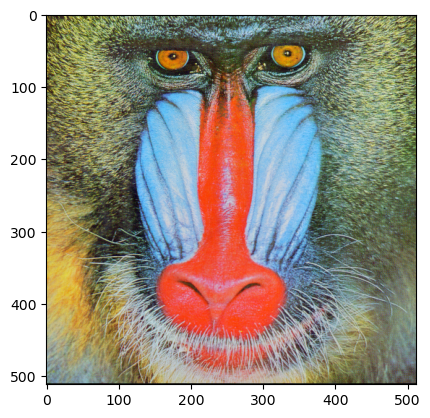

In [35]:
from skimage.io import imread, imshow
import numpy as np
import matplotlib.pyplot as plt
import math

def rgb_2_cmy (img):
    cmy_img = 1 - img / 255
    return cmy_img

def cmy_2_rgb(img):
    rgb_img = (1 - img) * 255
    return rgb_img


img = imread('mandrillFarbe.png')

cmy = rgb_2_cmy(img)
rgb = cmy_2_rgb(cmy).astype('uint8')

plt.imshow(rgb)



In [141]:
from skimage.color import rgb2hsv, hsv2rgb
def rgb_2_hsi(img):
    img = img/255 #Normieren auf 0..1
    #Farbebenen sammel
    r = img[:,:,0]
    g = img[:,:,1]
    b = img[:,:,2]
    
    theta = np.zeros((img.shape[0], img.shape[1])) #Zwischenvariable um später einfacher entscheiden zu können mit den if Fällen
    H = np.zeros((img.shape[0], img.shape[1]))
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            if(r[y, x] == g[y, x] == b[y, x]): #Auch aus Folien
                H[y, x] = 0
            else:
                theta[y, x] = math.acos((0.5 * ((r[y, x] - g[y, x]) + (r[y, x] - b[y, x]))) / math.pow((math.pow((r[y, x] - g[y, x]), 2) + ((r[y, x] - b[y, x]) * (g[y, x] - b[y, x]))), 0.5)) #Formel aus der Vorlesung
                theta[y, x] = np.degrees(theta[y, x]) #Umrechnung in Grad wie für HSI benötigt
                if b[y, x] > g[y, x]:
                    H[y, x] = 360 - theta[y, x] #Fallunterscheidung wie in Folien
                else:
                    H[y, x] = theta[y, x]
    
    S = np.zeros((img.shape[0], img.shape[1]))
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            if(r[y, x] == g[y, x] == b[y, x] == 0):
                S[y, x] = 0 #abfangen um nicht durch 0 zu teilen
            else:
                S[y, x] = 1 - ((3/(r[y, x] + g[y, x] + b[y, x])) * min(r[y, x], min(g[y, x], b[y, x]))) #Aus den Folien
    
    I = (r + g + b)/3 #aus den Folien
      
    return np.dstack((H, S, I))


def hsi_2_rgb(img):

    #HSI Ebenen sammeln
    H = img[:,:,0]
    S = img[:,:,1]
    I = img[:,:,2]
    
    r = np.zeros((img.shape[0], img.shape[1]))
    g = np.zeros((img.shape[0], img.shape[1]))
    b = np.zeros((img.shape[0], img.shape[1]))
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            if(0 <= H[y, x] < 120): #abfragen wie in den Folien
                hue = H[y, x]
                b[y, x] = I[y, x] * (1 - S[y, x])
                r[y, x] = I[y, x] * (1 + ((S[y, x] * math.cos(np.radians(hue))) / (math.cos(np.radians(60 - hue))))) #wie in den Folien
                g[y, x] = (3 * I[y, x]) - (r[y, x] + b[y, x])
            
            elif(120 <= H[y, x] < 240):
                hue = H[y, x] - 120
                r[y, x] = I[y, x] * (1 - S[y, x])
                g[y, x] = I[y, x] * (1 + ((S[y, x] * math.cos(np.radians(hue))) / (math.cos(np.radians(60 - hue)))))
                b[y, x] = (3 * I[y, x]) - (r[y, x] + g[y, x])
            
            elif(240 <= H[y, x] < 360):
                hue = H[y, x] - 240
                g[y, x] = I[y, x] * (1 - S[y, x])
                b[y, x] = I[y, x] * (1 + ((S[y, x] * math.cos(np.radians(hue))) / (math.cos(np.radians(60 - hue)))))
                r[y, x] = (3 * I[y, x]) - (g[y, x] + b[y, x])
    
    return (np.dstack((r, g, b)) * 255).astype(np.uint8)


hsi = rgb_2_hsi(img)
rgb_h = hsi_2_rgb(hsi)
hsi_V = rgb2hsv(img)

plt.imshow(rgb_h)

